In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import sys
import os


In [2]:
data_path = os.path.join(os.path.abspath('..'), 'data', 'raw', 'credit_card_data.csv')
df = pd.read_csv(data_path)
df_copy = df.copy()

In [3]:
df_copy.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


In [6]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [7]:
freq_is_fraud = len(df[df['isFraud'] == 1])
freq_not_fraud = len(df[df['isFraud'] == 0])


#a 1D array with two elements, representing the frequencies
arr = np.array([freq_not_fraud, freq_is_fraud])

labels = ['Not Fraudulent', 'Fraudulent']
print(f"Total No. of Non-Fraudulent Cases: {freq_not_fraud}")
print(f"Total No. Fraudulent Cases: {freq_is_fraud}")

Total No. of Non-Fraudulent Cases: 6354407
Total No. Fraudulent Cases: 8213


In [8]:
print("Note 1: Highly imbalanced dataset. Fraud vs Not Fraud cases is 8k vs 6 mil")

Note 1: Highly imbalanced dataset. Fraud vs Not Fraud cases is 8k vs 6 mil


In [9]:
df_corr = df[['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','isFraud','isFlaggedFraud']]

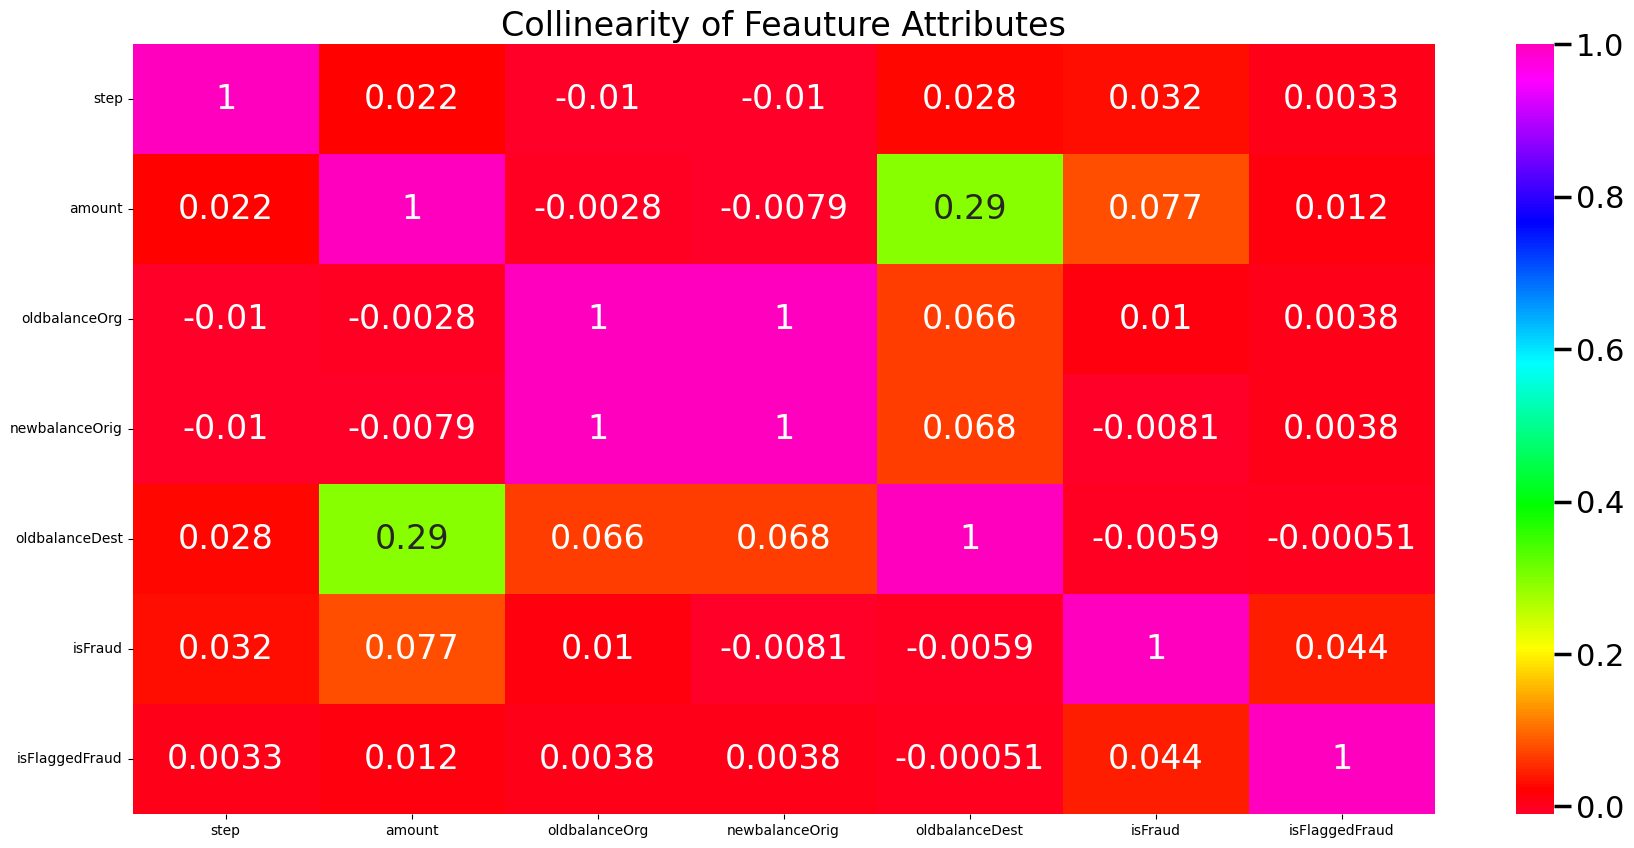

In [10]:
fig, ax = plt.subplots(figsize=(21,10))
sns.set_context('poster')
corr = df_corr.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns, cmap = 'gist_rainbow', annot = True)
ax.set_title("Collinearity of Feauture Attributes")
plt.savefig("cormap.png")


In [11]:
percent = ((len(df.loc[df.isFraud==1])) / (len(df.loc[df.isFraud==0]))) * 100
print(f"Percentage of Fraudulent Transanctions in the Dataset: {round(percent,2)}%")

Percentage of Fraudulent Transanctions in the Dataset: 0.13%


In [12]:
df["type"].nunique()


5

In [13]:
df["type"].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)